In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv ("youtube_recommendation_dataset -.csv")
df = data.loc [:, ("view_count","like_count","comment_count","favorite_count","engagement_rate","likes_to_views_ratio","comments_to_views_ratio","duration_seconds","video_age_days")]
df.head(10)

,view_count,like_count,comment_count,favorite_count,engagement_rate,likes_to_views_ratio,comments_to_views_ratio,duration_seconds,video_age_days
0,1405647,140463,9063,0,0.106375,0.099928,0.006448,111,1
1,2776847,26801,6684,0,0.012059,0.009652,0.002407,60,0
2,1189857,16174,1827,0,0.015129,0.013593,0.001535,1082,0
3,5319161,0,12869,0,0.002419,0.000000,0.002419,203,1
4,597542,41742,4728,0,0.077768,0.069856,0.007912,215,0
5,296652,10565,676,0,0.037893,0.035614,0.002279,4431,0
6,333414,33124,1778,0,0.104680,0.099348,0.005333,193,0
7,1925626,34578,1248,0,0.018605,0.017957,0.000648,123,0
8,755718,26231,5285,0,0.041703,0.034710,0.006993,1033,0
9,92297,4674,306,0,0.053956,0.050640,0.003315,176,0


<H1><I>Check Basic info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   view_count               537 non-null    int64  
 1   like_count               537 non-null    int64  
 2   comment_count            537 non-null    int64  
 3   favorite_count           537 non-null    int64  
 4   engagement_rate          537 non-null    float64
 5   likes_to_views_ratio     537 non-null    float64
 6   comments_to_views_ratio  537 non-null    float64
 7   duration_seconds         537 non-null    int64  
 8   video_age_days           537 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 37.9 KB


In [4]:
print ("Shape of dataset:", df.shape)

Shape of dataset: (537, 9)


In [5]:
df.dtypes

view_count                   int64
like_count                   int64
comment_count                int64
favorite_count               int64
engagement_rate            float64
likes_to_views_ratio       float64
comments_to_views_ratio    float64
duration_seconds             int64
video_age_days               int64
dtype: object

In [6]:
# Check missing values
print(df.isnull().sum())

view_count                 0
like_count                 0
comment_count              0
favorite_count             0
engagement_rate            0
likes_to_views_ratio       0
comments_to_views_ratio    0
duration_seconds           0
video_age_days             0
dtype: int64


In [7]:
df.describe()

,view_count,like_count,comment_count,favorite_count,engagement_rate,likes_to_views_ratio,comments_to_views_ratio,duration_seconds,video_age_days
count,5.370000e+02,5.370000e+02,537.000000,537.0,537.000000,537.000000,537.000000,537.000000,537.000000
mean,2.145752e+07,4.336044e+05,7125.700186,0.0,0.028722,0.027692,0.001030,4802.746741,934.050279
std,4.015200e+07,8.386711e+05,36075.115032,0.0,0.020608,0.019708,0.002166,13748.249437,904.546132
min,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.676921e+06,5.559100e+04,1018.000000,0.0,0.015579,0.015301,0.000115,52.000000,261.000000
50%,6.385911e+06,1.550550e+05,2354.000000,0.0,0.024368,0.023565,0.000398,390.000000,658.000000
75%,2.270604e+07,4.631890e+05,5925.000000,0.0,0.037366,0.036282,0.000954,1639.000000,1363.000000
max,3.697310e+08,1.087934e+07,810641.000000,0.0,0.215744,0.199095,0.026031,105227.000000,4772.000000


<h1><i>Exploratory Data Analysis

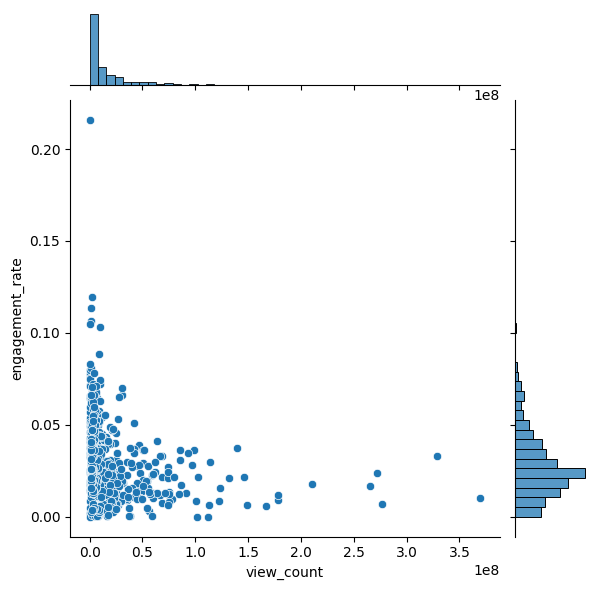

In [8]:
sns.jointplot (x="view_count",
              y="engagement_rate",
              data=df)

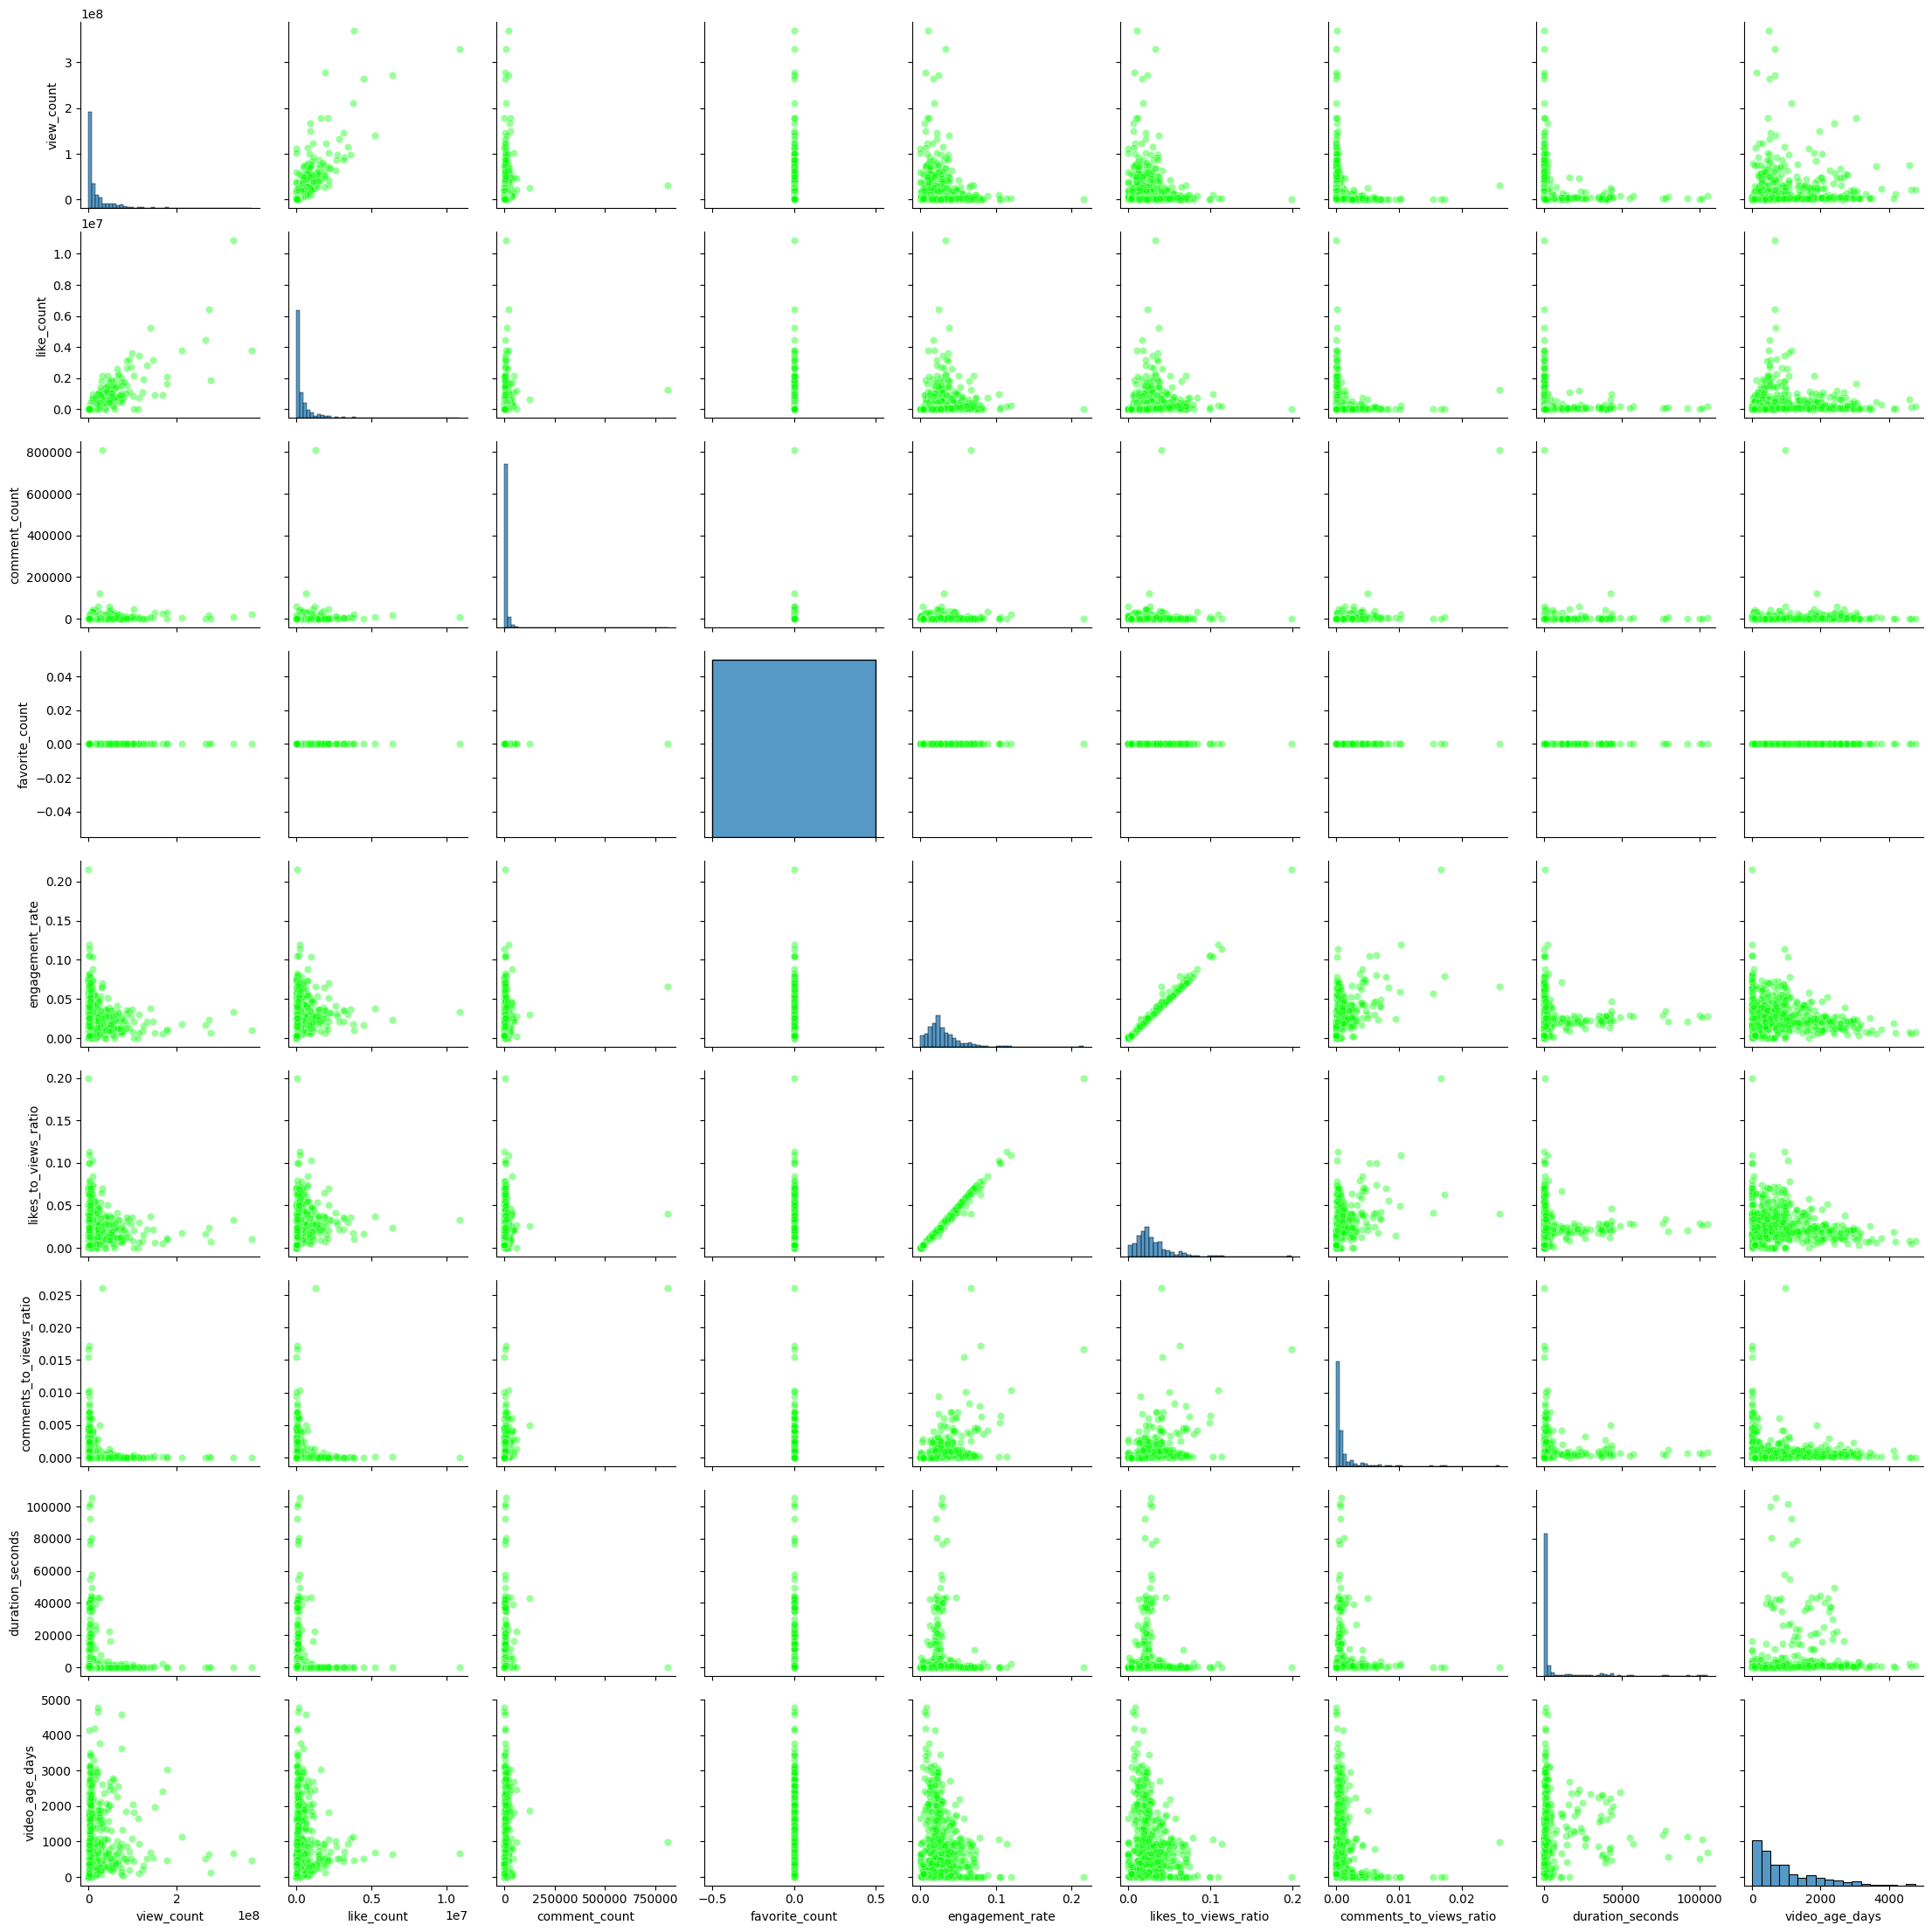

In [9]:
sns.pairplot (df, kind="scatter", plot_kws = {"alpha":0.4,"color":"lime"})

In [10]:
# Check correlation matrix
corr_matrix = df.corr(numeric_only= True)
print(corr_matrix['engagement_rate'].sort_values(ascending=False))

engagement_rate            1.000000
likes_to_views_ratio       0.995224
comments_to_views_ratio    0.459268
comment_count              0.068162
like_count                 0.020476
duration_seconds          -0.061339
view_count                -0.212569
video_age_days            -0.247985
favorite_count                  NaN
Name: engagement_rate, dtype: float64


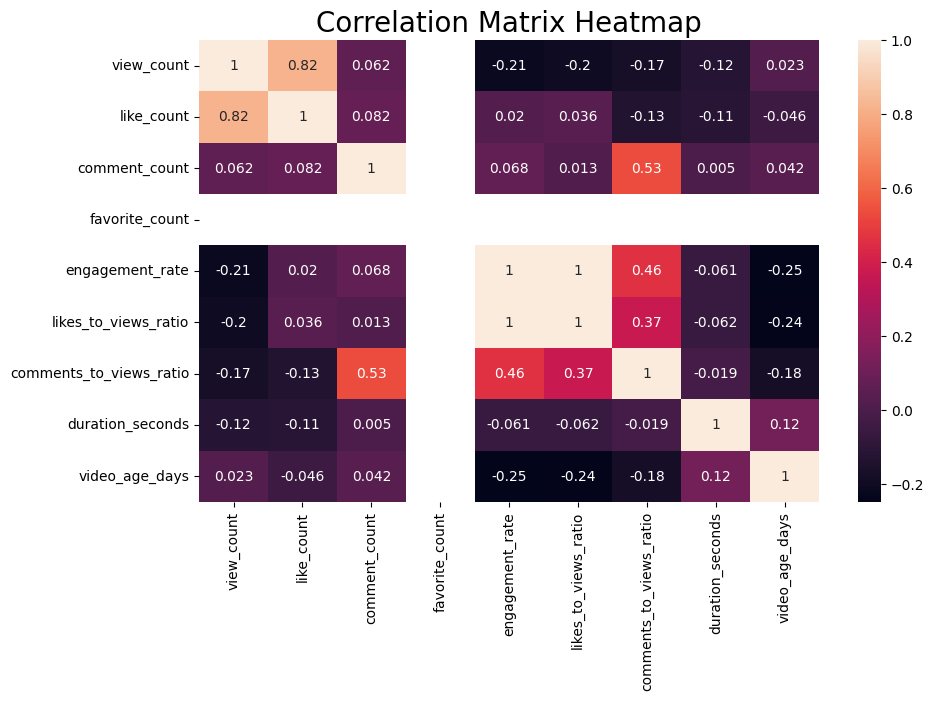

In [11]:
# Lets visualize it on a Plot
plt.figure (figsize=(10,6))
sns.heatmap (corr_matrix ,annot = True)  # Annot shows corr number
plt.title("Correlation Matrix Heatmap",fontsize= 20)
plt.show()

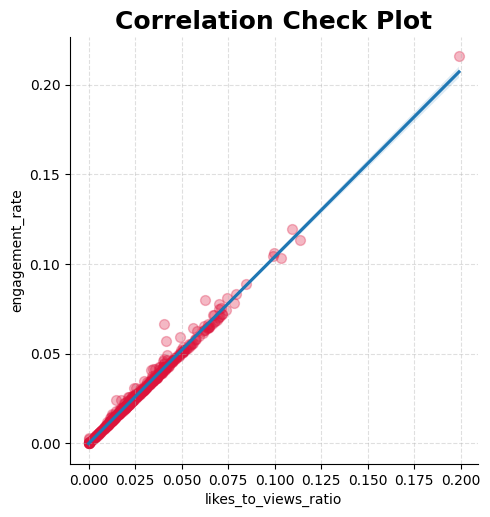

In [12]:
sns.lmplot (x="likes_to_views_ratio",y= "engagement_rate",data= df,
            scatter_kws={"alpha": 0.3,
            "color":"crimson",
                        "s":50})

plt.title ("Correlation Check Plot", fontweight= "bold", fontsize= "18")
plt.grid (alpha = 0.4, linestyle= "--")
sns.despine()
plt.show()

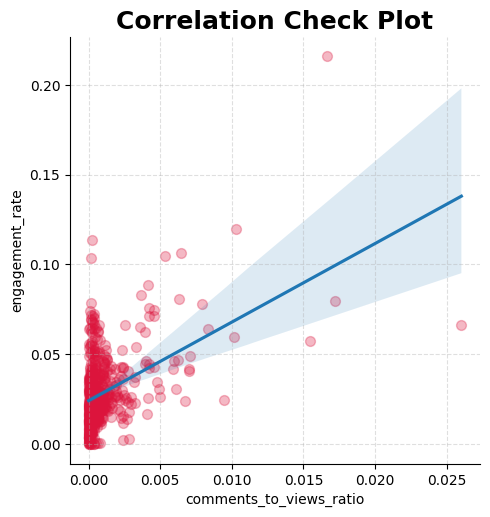

In [13]:
sns.lmplot (x="comments_to_views_ratio",y= "engagement_rate",data= df,
            scatter_kws={"alpha": 0.3,
            "color":"crimson",
                        "s":50})

plt.title ("Correlation Check Plot", fontweight= "bold", fontsize= "18")
plt.grid (alpha = 0.4, linestyle= "--")
sns.despine()
plt.show()

In [14]:
X = data[["likes_to_views_ratio"]]
Y = data["engagement_rate"]

In [15]:
from sklearn.model_selection import train_test_split

x_test,x_train,y_test,y_train = train_test_split (X,Y, test_size= 0.2, random_state= 42)

<h1><i><b>Training the Model

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit (x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
Coef = pd.DataFrame (model.coef_, X.columns, columns= ["Coefficents"])
Coef

,Coefficents
likes_to_views_ratio,1.046408


In [18]:
print("Weight (w):", model.coef_[0])
print("Bias (b):", model.intercept_)

Weight (w): 1.0464077710495407
Bias (b): -1.690857621283043e-05


In [19]:
pred = model.predict(x_test)

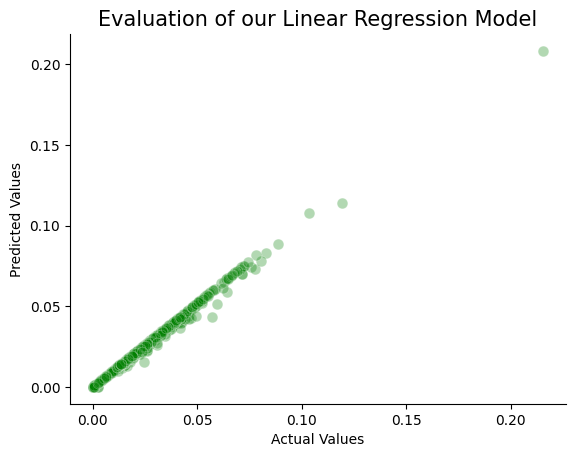

In [20]:
sns.scatterplot (x= y_test, y= pred, color="green", s=60, alpha=0.3)
plt.xlabel("Actual Values")
plt.title ("Evaluation of our Linear Regression Model",
          fontsize= 15)

plt.ylabel("Predicted Values")
sns.despine()
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = math.sqrt(mse)  # RMSE = sqrt(MSE)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

MSE: 2.8089863178156575e-06
MAE: 0.0010743742330385168
RMSE: 0.0016760030781044699


In [22]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, pred)
print("R² Score:", r2)

R² Score: 0.9930623043962674


<Figure size 1000x600 with 0 Axes>

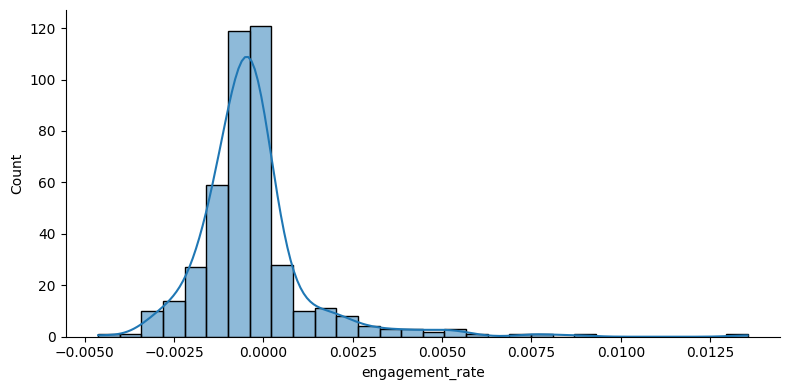

In [23]:
plt.figure (figsize=(10,6))

residuals = y_test - pred
sns.displot (residuals,bins= 30, kde=True,height=4,aspect=2)

In [24]:
# Residual Mean
R_mean = residuals.mean()
print ("Residual Mean:",R_mean)

Residual Mean: -0.00029803455136044653


In [25]:
target_mean = data['engagement_rate'].mean()
percentage = abs(R_mean) / target_mean * 100
print(f"Comparison of Residual with Targeted: {percentage:.2f}%")

Comparison of Residual with Targeted: 1.04%


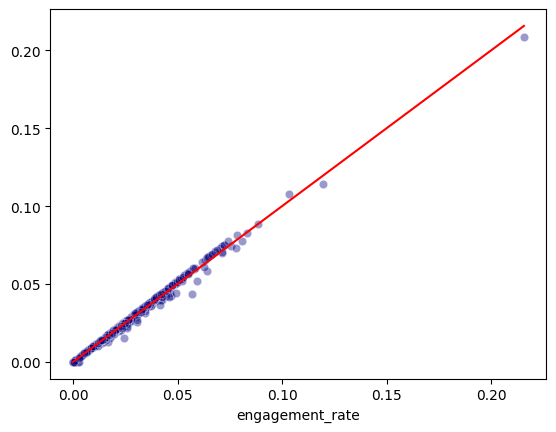

In [26]:
sns.scatterplot(x=y_test, y=pred, color='navy',alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

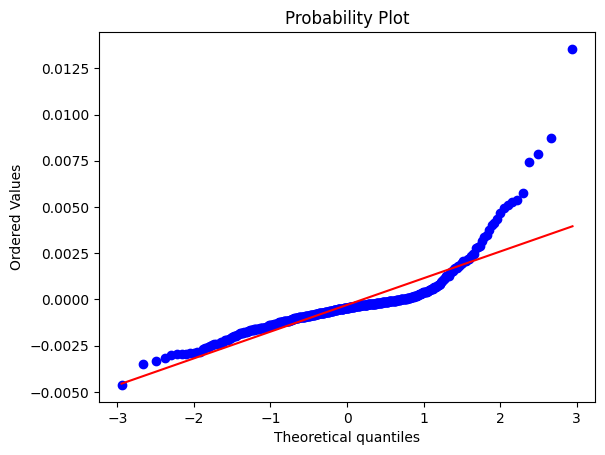

In [27]:
import pylab
import scipy.stats as stats

stats.probplot (residuals, dist="norm", plot=pylab)
pylab.show()